# MATH 210 Project A

Project members:

* William Kendrick: 72587512
* Alessandro Adami: 32441974
* Sean Donaghy: 93591923

### Background information
* Spruce Budworms are a species of bug which causes defoliation in both Birch and fir trees.
* This defoliation weakens and kills trees over several years.

### Short term dynamics:

* Spruce Budworms reproduce and eat new and year old foliage.
* Spruce Budworm predators don't reproduce quickly.
* Predators are busy eating other insects and don't bother searching for Spruce Budworms until they are plentiful

### Main goal:

We want to find out how the steady states change when we increase/decrease the parameters.

### Ludwig et.al model

Ludwig et al. described the population dynamics of Spruce Budworms using the following model where:

* $B$ is the size of the budworm population
* $r_B$ is the growth rate constant for budworm
* $K_B$ is the carrying capacity of the budworm in the abscence of predation
* $\beta$ is the strength of predation
* $\alpha$ is related to the budworm population size

Mode:

$$
\frac{dB}{dt} = r_BB(1-\frac{B}{K_B}) - \beta \frac{B^2}{\alpha^2 + B^2}
$$



### Step 1
Write a Python function called f which takes input parameters `B, r, K, beta, alpha`, and `n`, and returns
the value of the right hand side of the differential equation:

$$
f(B;r,K,\beta,\alpha,n) = r_BB(1-\frac{B}{K_B}) - \beta \frac{B^n}{\alpha^n + B^n}
$$

In [114]:
def f(B,r,K,beta,alpha,n):
    value = r*B*(1 - B/K) - beta*(B**n/(alpha**n + B**n))
    return value


assert(f(1,5,5,5,5,5)) == 5*1*(1-1/5) - 5*(1**5/(5**5 + 1**5))
assert(f(2,30,4,10,2,6)) == 30*2*(1-2/4) - 10*(2**6/(2**6 + 2**6))


### Step 2
Compute the derivative of $f$ with respect to $B$. Write a Python function called df which takes input
parameters `B, r, K, beta, alpha`, and `n`, and returns $f ′(B; r, K, \beta, \alpha, n)$.

In [115]:
def df(B,r,K,beta,alpha,n):
    value = r-2*r*B/K - beta*alpha**n*n*B**(n-1)/(alpha**n + B**n)**2
    return value

assert(df(1,2,3,4,5,6)) == 2-2*2*1/3 - 4*5**6*6*1**(5)/(5**6+1**6)**2

### Step 3
Choose `r = 1, K = 100, β = 10, α = 5, and n = 4`. Use the following Python code to plot f (B).

([<matplotlib.lines.Line2D at 0x7f7d7b09ccd0>], None)

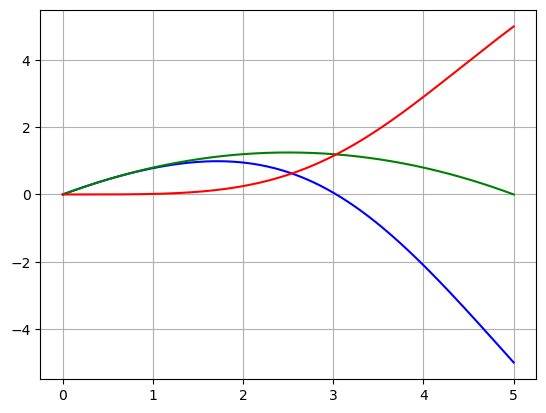

In [116]:
import numpy as np
import matplotlib.pyplot as plt

B = np.linspace(0,5,200)
fB = f(B,1,5,10,5,4)
plt.plot(B,fB, 'b'), plt.grid(True)

gB = 1*B*(1-B/5)
plt.plot(B,gB, 'g'), plt.grid(True)

qB = 10*B**4/(5**4 + B**4)
plt.plot(B,qB, 'r'), plt.grid(True)




### Step 4
Use Newton’s method to approximate all steady state solutions for the parameter values chosen in the
previous part. Classify the steady states

#### Newtons Methods

Let $f(x)$ be a differentiable function and suppose 
there exists a root $r$ of $f(x)$ in $[a,b]$.
We can approximate $f(x)$ by the tangent line at $x_0$ near $r$:
$y = f'(x_0)(x-x_0)+f(x_0)$

Find $x$ where the tangent line crosses the $x$-axis and that point should be closer to $r$

$0 = f'(x_0)(x_1-x_0) + f(x_0)$

$x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$ and repeat this!

$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$ And we hope $x_n -> r$ as $n - > \infty$

In [117]:
r = 1
K = 1000
beta = 10
alpha = 5
n = 4
def newtons(a,N):
    B = [a]
    for o in range(N):
        B.append(B[o] - f(B[o],r,K,beta,alpha,n)/df(B[o],r,K,beta,alpha,n))
    return (B[-1])

print(newtons(0,100))
print(newtons(5,100))
print(newtons(15,100))
print(newtons(900,100))


0.0
4.975365895795289
9.322765070828416
989.897948563279


### Step 5

How do the steady states change when we increase/decrease each of the parameters?

#### K

As K increases, the steady states with small populations of bugs stay relatively the same, for a change of 900 units in K.

However the final steady state with a large population had a change proportional to the change in K.

As K decreases, the number of steady states decreases to two since the carrying capacity being so limited added on with the predation rate
 hello